# L09-1 Intruduction to Unsupervised Learning
## Assignment Instructions

Rename with your name in place of Studentname and make your edits and updates here. Run each cell one at a time to make sure you understand what the code is doing.

You'll find 3 <font color="blue">Your Turn</font> prompts for exercises and questions to complete in this lab.


# Introduction to Unsupervised Learning

## Overview

**Unsupervised learning** is a form of machine learning that does not require labels or marked cases. This flexibility can be a distinct advantage, as most of the world's data will not have known labels. However, the lack of known label values in the data means that evaluation and even model understanding can be difficult. 

Many sophisticated unsupervised learning algorithms have been developed and continue to be developed. In this lesson we will focus on two classes of unsupervised learning algorithms. K-means clustering and hierarchical clustering:

- **K-means clustering** algorithms divided the data into `k` clusters. The clusters are groups of points close together as measured by the chosen metric. 
- **Hierarchical clustering** algorithms seek to divide the data into similar groups using a hierarchy of divisions. The result is a tree-like structure with similar data values shown as closely related. 

***
**Note:** to run this notebook you must have the following packages installed:
- tidyverse
- ggplot2
- cluster
***

## Introduction to K-means Clustering

K-means clustering is one of the oldest and most widely used unsupervised learning methods. The term **k-means** was introduced by James MacQueen some 50 years ago in his paper: [Some methods for classification and analysis of multivariate observations. Proc. 5th Berkeley Symp. Math. Stat. Probab., Univ. Calif. 1965/66, 1, 281-297 (1967).](https://zbmath.org/?format=complete&q=an:0214.46201) Even by that time, algorithm was invented independently in several contexts and using different names by Hugo Steinhaus in 1957, Stuart Lloyd in 1957, and E. W. Forgy in 1965. To this day, you will sometimes see this method referred to as the Lloyd-Forgy method, or Lloyd's algorithm. 

### The little theory

The k-means algorithm is still widely used since it is fast, highly scalable and works well in many practical cases. The basic idea of k-means clustering is to find `k` groups of data which minimize the distances from the cluster centers to the data values in each group. The basic steps used in the algorithm are:

1. Start with a set of `k` initial **cluster centers**. 
2. Each data case is assigned to the nearest center. 
3. For each data group, the `k` centers are moved to minimize the mean distance to the points in the group. 

When thinking about the practical aspects of this algorithm there are several point you should consider. 

1. The result can depend on the initial choice of cluster centers. Starting with different cluster centers may, or may not, result in data cases being in different clusters. In some cases, you may need to run the k-means algorithm several times with new random starting positions. 
2. The distance between the cluster centers and the data cases can be measured by a number of metrics. The most common distance metrics are **Euclidian** and **Manhattan**. 
  - Euclidian distance is the based on the shortest distance between two points, or the 'as the crow flies' distance. We can write the distance between two `n` dimensional vector valued points $x$ and $y$ as:
  $$D_{Euclidian} = \sum_n sqrt(x_i - y_i)^2$$
  - The Manhattan distance is also know as the taxi cab metric. This is the distance you would travel on a grid, such as the streets of a city. We can write the Manhattan distance between two vector valued points $x_1$ and $x_2$ as:
  $$D_{Manhattan} = \sum_n | x_i - y_i | \\
  where\\
  |\ | = absolute\ value $$
  
Why does the metric matter? Very simply, different distance metrics will often give different clustering solutions. 

### Evaluation cluster models

We should consider what we mean by the a good set of clusters. Since, by definition in unsupervised learning, we don't have any known labels to measure error against, evaluation can be challenging.  

Clearly, we want our clusters to have minimal dispersion. First, we need to define a measure of dispersion of the clusters, **Within Cluster Sum of Squares** or **WCSS**. 

$$WCSS = Min \sum_i \sum_{j\ in\ cluster\ i} ||x_j - c_i||^2 \\
where\\
c_i = center\ of\ ith\ cluster\\ 
and\\
||x_j - c_i|| = distance\ between\ data\ x_j\ and\ center\ c_i
$$

We can use WCSS to compare different cluster models. Models with smaller SSW have tighter clusters. In other words, tight clusters have data points close to the centroid so $||x_j - c_i||$ is smaller. 

A related statistic is the **between cluster sum of squares** or **BCSS**. The BCSS gives us information on the how well separated the clusters are. We can understand this statistic by looking at the relationship between the **total sum of squares** or **TSS**, the WCSS and the BCSS:

$$
TSS = BCSS + WCSS\\
where\\
TSS = \sum_i (x_i - \mu)^2\\
where\\
\mu = mean\ of\ all\ points
$$

In summary, the TSS is just the variance of all data points. The BCSS is the difference between TSS and WCSS.

Another measure of clustering is the **silhouette coefficient** or **SC**. The silhouette coefficient measures the relationship between the distances within a cluster and to the nearest adjacent cluster. We can define the SC for the $ith$ member of a cluster as follows:

$$
SC_i = \frac{b_i -a_i }{max(a_i, b_i)}\\
where\\
a_i = average\ distance\ from\ point\ i\ to\ other\ members\ of\ the\ cluster\\
b_i = average\ distance\ from\ point\ i\ to\ members\ of\ an\ adjacent\ cluster
$$

How can you best understand the properties of the silhouette coefficient? First, given the normalization the SC is limited in values:

$$\{ -1 \lt SC \lt 1 \}$$

If the clusters are compact and well separated from adjacent clusters:

$$if\ a_i \lt b_i\ then\ SC \gt 0$$

However, if the clusters are dispersed and not well separated from adjacent clusters:

$$f\ a_i \gt b_i\ then\ SC \lt 0$$

Notice that if the data cases in the cluster are close together and the average distance to the members of the adjacent cluster are large, the value of the SC will be close to 1. This indicates the cluster is tight and well separated from adjacent clusters. 

Conversely, if the average distances to the members of the adjacent cluster is small and the distances to the other members of the cluster is large, the SC will have a value less than 0. This situation indicates loose clusters which are not well separated.  

In summary, we would prefer a cluster solution with the SC values close to 1. If SC values are consistently less than 0, our cluster solution is not particularly good. 

### K-means example - Iris data

The iris data set has a long history in statistics. It was originally collected by botanist Edgar Anderson who was attempting to quantify the morphological characteristics of a family of flowers. The influential and pioneering statistician Ronald A Fisher used the data set for his 1936 paper or linear discriminant analysis: quite possibly the first paper on a classification algorithm. 

To get started, let's examine the iris data. As a first step, we will look at the properties of the data in each of the columns and then the unique number of species represented. Execute the code in the cell below and examine the results.

In [1]:
require(tidyverse)
glimpse(iris)
cat('\n The unique species are:')
unique(iris$Species)

Loading required package: tidyverse
Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


Observations: 150
Variables: 5
$ Sepal.Length <dbl> 5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4,...
$ Sepal.Width  <dbl> 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7,...
$ Petal.Length <dbl> 1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5,...
$ Petal.Width  <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2,...
$ Species      <fctr> setosa, setosa, setosa, setosa, setosa, setosa, setos...

 The unique species are:

[1] setosa     versicolor virginica 
Levels: setosa versicolor virginica

Next, we will display a scatter-plot matrix of the features. The code in the cell below creates scatter plot pairs for each of the features of the flowers Anderson measured. The features are in the first 4 columns of the data frame. The color argument `col` is used to show which of the three species is being plotted, from the three possible species. Execute this code and examine the results.

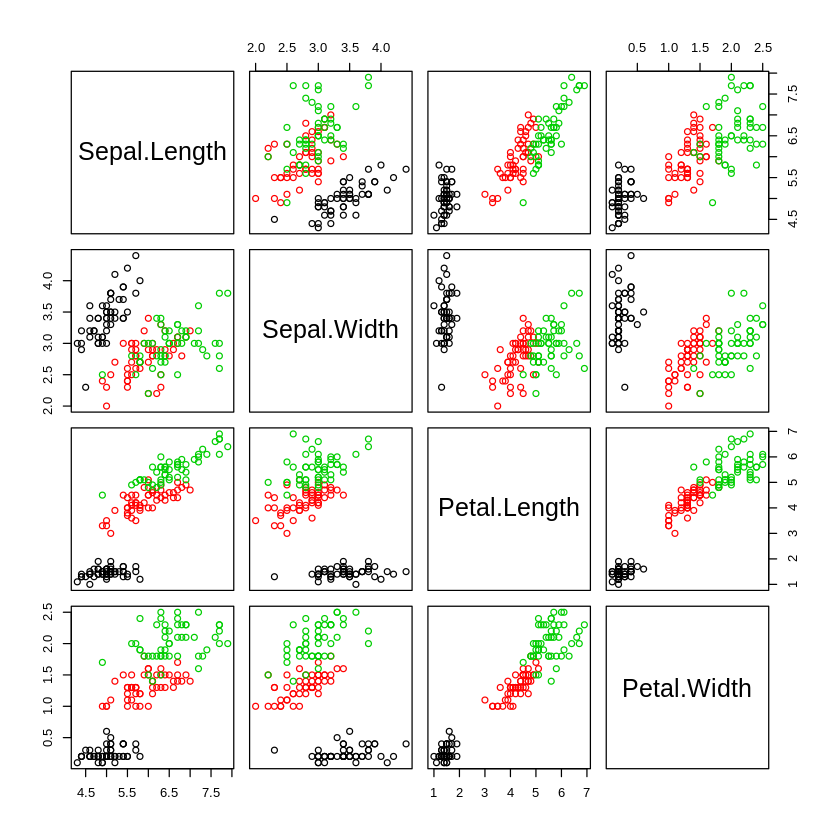

In [2]:
pairs(data = iris, ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, 
      col = iris$Species)

Examine these results. Notice that one species is well separated from the other two by the values of these features. The other two species are fairly well separated, particularly by petal characteristics, but with some overlap.  

We are now ready to compute our first cluster model. We will start with a simple case, using Euclidian distance and three clusters; $k = 3$.

It is essential to scale the features before computing the distance matrix. Otherwise, as is the case of other machine learning algorithms, features with numerically large values will dominate the training of the model. 

Execute the code in the cell below which scales the features and computes the 3 k-means clusters. 

In [3]:
set.seed(3344)
iris.scale = data.frame(lapply(iris[, 1:4], scale))
clusts.3 = kmeans(iris.scale, centers = 3)

Let's make a plot to see how these 3 clusters look. We will use the R `pairs` function once again. This time, the `col` argument uses the cluster number, $\{ 1, 2, 3 \}$. Execute this coded and examine the results. 

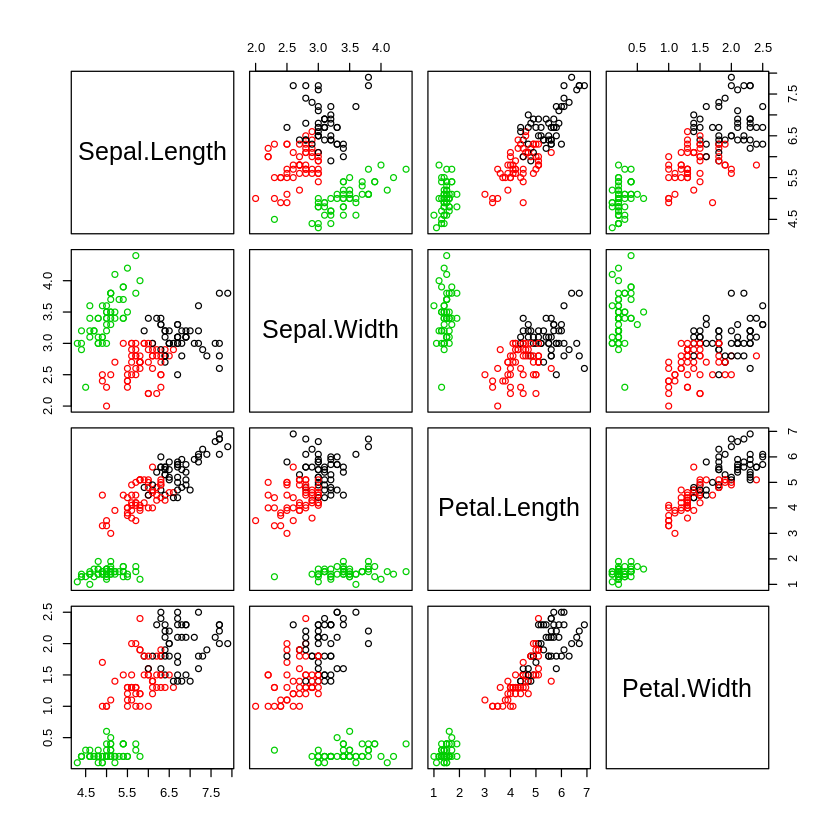

In [4]:
pairs(data = iris, ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, 
      col = clusts.3$cluster)

As you can see, the points of the three clusters appear to be follow the three species rather well. 

There is one more way we can investigate these clusters. In this case we know the species, so we can use the R frequency `table` function to see which clusters the species fall in.

In [5]:
table(clusts.3$cluster, iris$Species)

   
    setosa versicolor virginica
  1      0         11        36
  2      0         39        14
  3     50          0         0

The table shows that the all of the setosa iris are in one cluster. Most of the versicolor and virginica are in different clusters, but with some overlap. This overlap is similar to what one would expect given the separation of these species by the features. 

### Finding the number of clusters

We have investigated our first k-means cluster model with $k = 3$. The next question is, how many clusters ($k$) are optimal. As we are dealing with unsupervised learning models the answer is generally not obvious. 

One approach to determining the number of clusters is to plot the within cluster sum of squares (WCSS) against the number of clusters. The code in the cell below creates just such a plot by the following steps:
1. A list of k-means cluster models are computed over a range of $k$ values.
2. The WCSS is plotted within a function in these steps:
  - A data frame is created with the number of cluster and the WCSS in the columns.
  - ggplot2 is used to plot the WCSS vs. $k$.

Execute this code and examine the result.

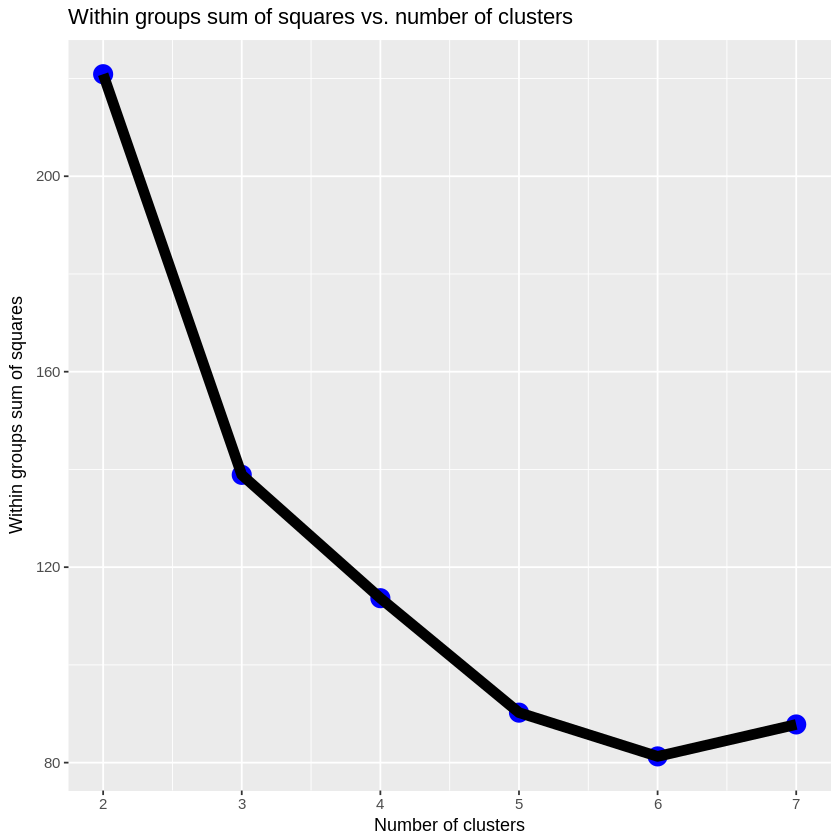

In [6]:
set.seed(3344)

## Make a list of cluster objects for different values of k
k.clustering = function(k.start, k.end, df){
  lapply(k.start:k.end, function(k) kmeans(df, centers = k))
}
k.clusts = k.clustering(2, 7, iris.scale)
         
## Plot the within cluster SS for each value of k         
plot.within = function(clusts){
  require(ggplot2)
  len = length(clusts)
  df = data.frame( x = 2:(len + 1), 
                  y = sapply(1:len, function(i) sum(clusts[[i]]$withinss)))
  ggplot(df, aes(x, y)) + 
    geom_point(size = 5, color = 'blue') + geom_line(size = 3) +
    ylab('Within groups sum of squares') +
    xlab('Number of clusters') +
    ggtitle('Within groups sum of squares vs. number of clusters')
}
plot.within(k.clusts)

Notice that there is an abrupt change in slope between $k = 3$ and $k = 4$. This break in the curve or 'knee' shows the point at which additional clusters are not significantly reducing the WCSS. Thus, we can conclude that that the correct number of clusters is $3$ or $4$.

### Comparing the models

The question now is should you use the $k=3$ or $k=4$ model. The $k=4$ model has a lower WCSS, indicating the clusters are tighter. However, we should consider other metrics for comparing the models. 

A plot of the cluster assignments by features shows how the clusters partition the data values. Execute the code in the cell below to compute a $k = 4$ clustering model and then plots the clusters. Execute this code and examine the results.    

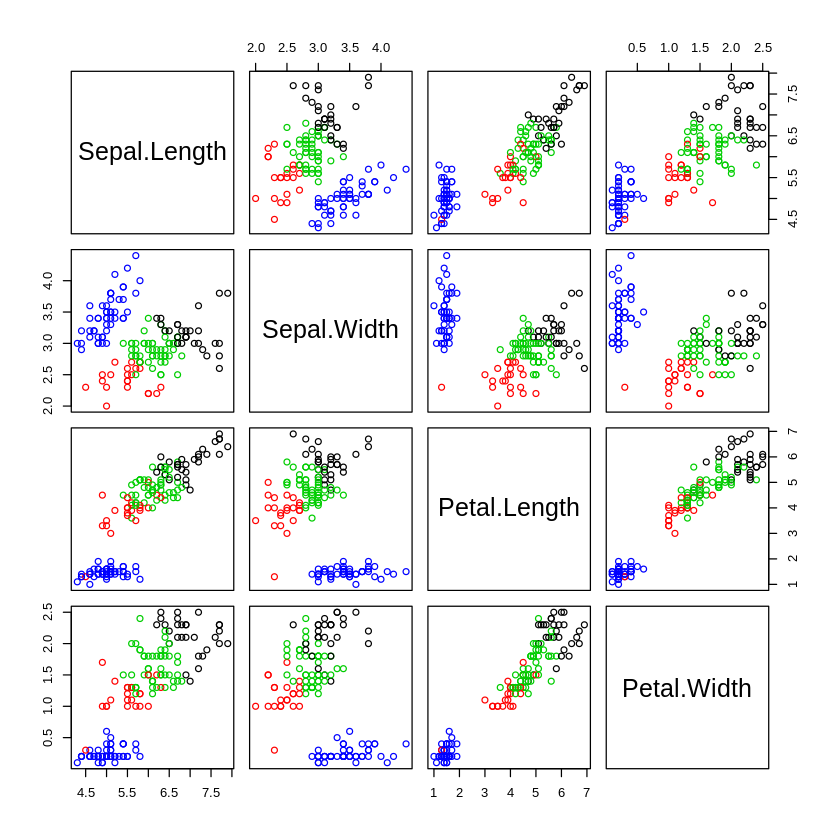

In [7]:
clusts.4 = kmeans(iris.scale, centers = 4)
pairs(data = iris, ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, 
      col = clusts.4$cluster)

Notice that the $k = 4$ model as divided some of the $k=3$ clusters into smaller clusters. This accounts for the reduction in WCSS.

We can print the WCSS and BCSS from the cluster model object. Execute the code in the cell below to print these statistics. 

In [8]:
print(clusts.3$withinss)
print(sum(clusts.3$withinss))
print(clusts.3$betweenss)

[1] 47.45019 44.08754 47.35062
[1] 138.8884
[1] 457.1116


On their own, it is hard to interpret these statistics. We will use them to compare the properties of this model with other models.

Another way to compare these models is to use the silhouette coefficients of the clusters. The R cluster package includes the `silhouette` function which computes the silhouette coefficients for the clusters. The `plot` method plots the results in the table of silhouette coefficients. The second argument of the `silhouette` function is a distance matrix which can be computed with the `dist` function. 

Execute the code in the cell below and examine the silhouette plots. 

Loading required package: cluster


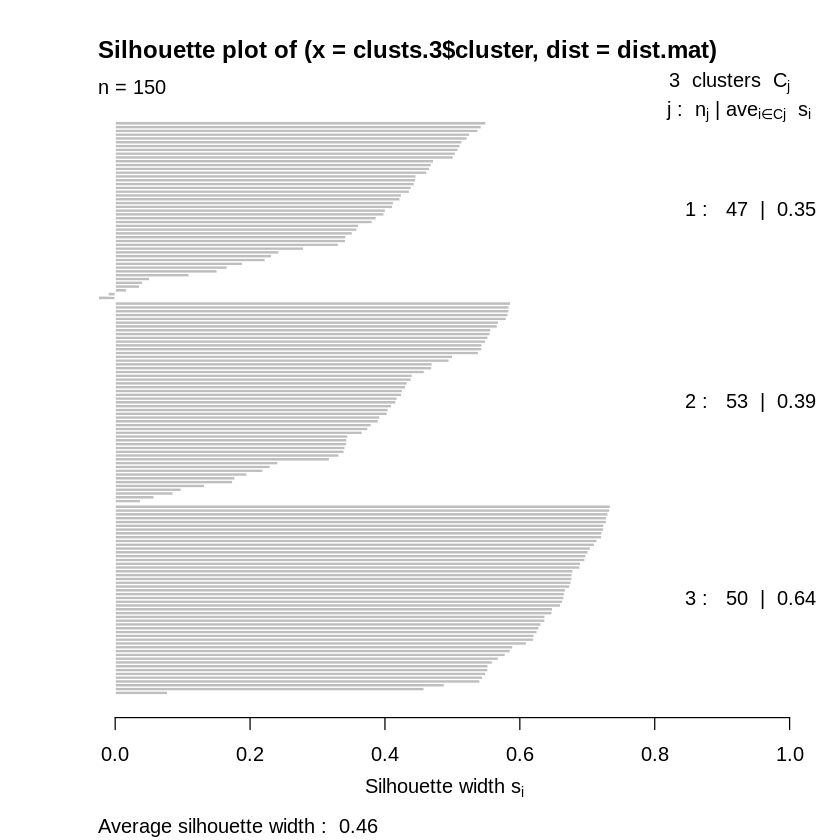

In [9]:
require(cluster)
dist.mat = dist(iris.scale)
plot(silhouette(clusts.3$cluster, dist.mat))

Notice The following about these plots:

- The silhouette plots show the silhouette coefficients organized by cluster and sorted from the largest to smallest values. 
- Three numbers are shown to the right of the plot for each cluster indicating: the cluster number, the number of data cases in the cluster and, the average SC for the cluster. 

In this case, the SC is shown for all 3 clusters. You can make the following observations:  
- The silhouette of cluster 3 has all positive values and the average SC is relatively high, 0.64.
- The silhouette of cluster 2 has only one negative value, and a moderate average SC; 0.39.
- The silhouette of cluster 1 has multiple negative values, and a fairly low average SC' 0.35. 

From these observations we can conclude that cluster 3 is relatively tight and well separated. Cluster 2 is a bit less well separated since the average SC is lower and there is a  negative SC value. Cluster 1 is not well separated since there are multiple negative SC values and a fairly low average SC. 

Let's compare the above results with the $k=4$ cluster model. 

Execute the code in the cell below to print the WCSS and BCSS. 

In [10]:
print(clusts.4$withinss)
print(sum(clusts.4$withinss))
print(clusts.4$betweenss)

[1] 26.89129 17.04641 29.59039 40.12172
[1] 113.6498
[1] 482.3502


Compare these statistics to those of the $k=3$ model. In summary, the $k=4$ clusters have smaller WCSS indicating smaller cluster size. However, the BCSS is larger, indicating the clusters are better separated.

***
# <font color="blue">Your Turn:</font>

The frequency table by species of the cluster assignments helps you understand these assignments. In the cell below, create and ###execute the code to print such a frequency table.
***

In [11]:
table(clusts.4$cluster, iris$Species)

   
    setosa versicolor virginica
  1      0          2        27
  2      1         19         2
  3      0         29        21
  4     49          0         0

<div style="background-color: ivory">
<h3> Question:</h3>
Compare these results to the results for the $k=3$ model. What is the significant difference? 
</div>

### Answer:

Next, execute the code in the cell below to display the silhouette plots for the $k=4$ model.

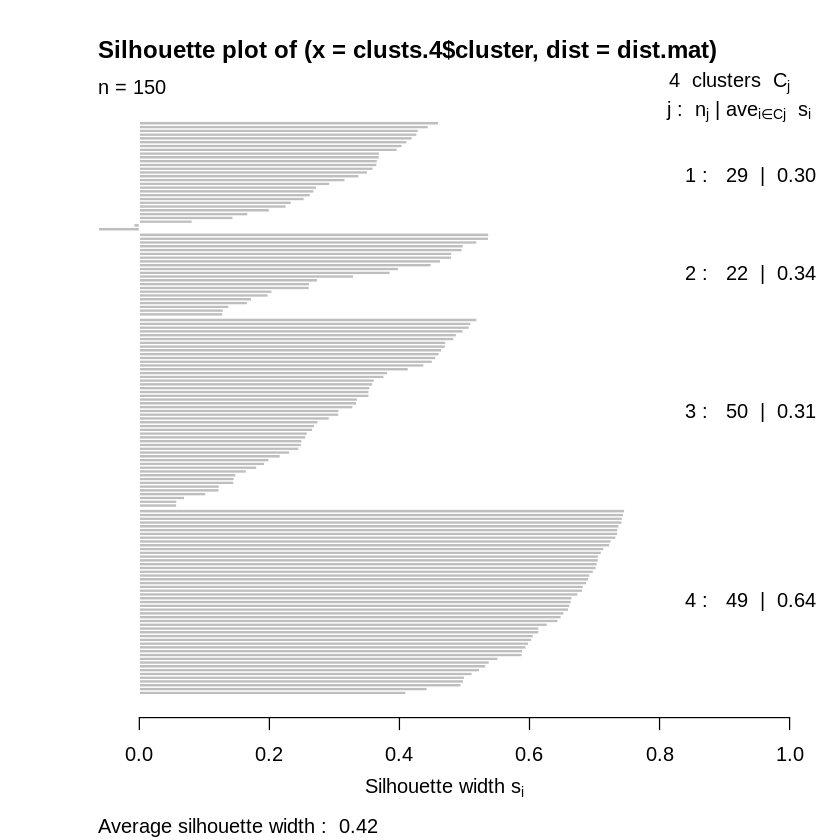

In [12]:
plot(silhouette(clusts.4$cluster, dist.mat))

Examine this silhouette plot and compare it to the silhouette plot for the $k=3$ model. 

The number of negative SC values is similar to the $k=34 model. However, average SC values are lower. 

We will prefer the $k=3$ model with the following reasoning:
- While the WCSS is smaller and the BCSS is larger for the $k=4$ model.  
- The SC statistics for the $k=3$ model are better. 
- Since the metrics (WCSS, BCSS, SC) are somewhat contradictory, we will prefer the simpler $k=3$ model. 

***
# <font color="blue">Your Turn:</font>

Recall that for the plot of WCSS vs. $k$, the knee in the curve could be at $k=4$ and $k=5$. We have already explored the $k=4$ model. Now, you will investigate and compare the $k=5$ model. You will do this by the following steps:
1. Compute a $k=5$ k-means clustering model.
2. Compute and display a frequency table by species of the cluster assignments.
3. Make a pairs plot of the features, with `col = clusts.5$cluster`.
4. Compute and print the WCSS for the clusters, sum of WCSS and BCSS.
5. Display the silhouette plot for the clusters.
***

   
    setosa versicolor virginica
  1      0          0        18
  2      0         29        21
  3     49          0         0
  4      1         21         2
  5      0          0         9

[1] 12.220084 30.436677 40.121722 18.898041  3.091184
[1] 104.7677
[1] 491.2323


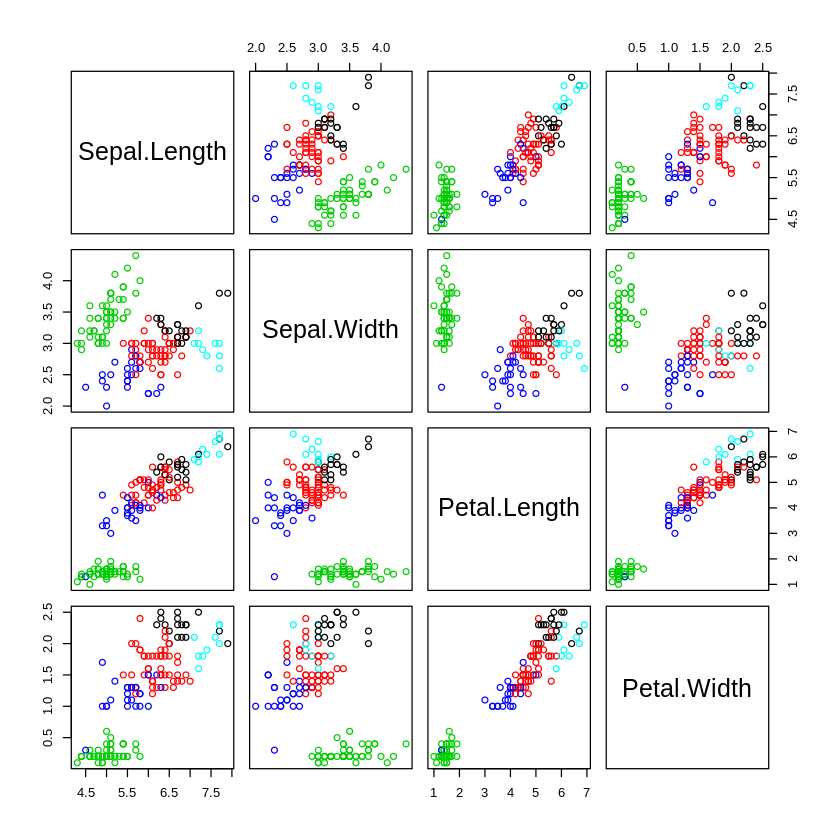

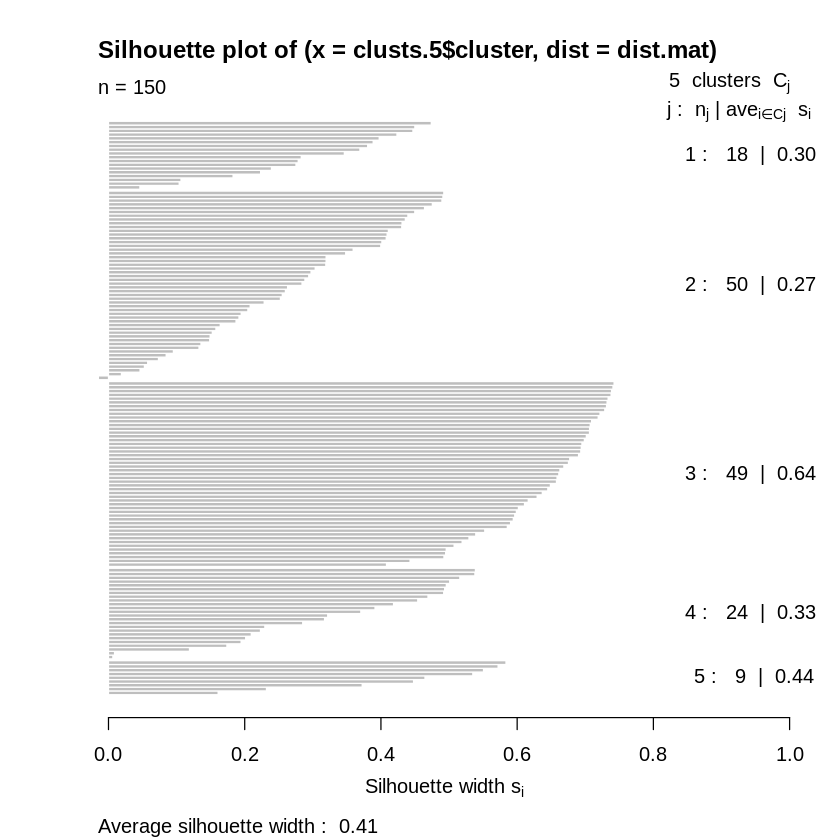

In [14]:
clusts.5 = kmeans(iris.scale, centers = 5)

table(clusts.5$cluster, iris$Species)

pairs(data = iris, ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, 
      col = clusts.5$cluster)

print(clusts.5$withinss)
print(sum(clusts.5$withinss))
print(clusts.5$betweenss)

plot(silhouette(clusts.5$cluster, dist.mat))

<div style="background-color: ivory">
<h3>Questions:</h3>
<p>Compare the results above to the results for the $k=4$ model. Answer the following questions:</p>
<ol>
<li>How does the frequency table and pairs plot compare to the table for the $k=5$ model? </li>
<li>How to the cluster WCSS, sum of WCSS and BCSS compare to the $k=4$ model? </li>
<li>How do the silhouette plot and average SCs compare the $k=4$ model?</li>
</ol>
</div>

### Answers:
1.

2.

3.

## Introduction to Hierarchical Clustering

Another widely used form of clustering uses hierarchical modes. These models attempt to divide or partition the data following a hierarchical sequence. 
Hierarchical clustering models produce a tree-like organization of the data into a hierarchy of clusters. At the root of the tree, all data cases are in one large cluster. The leaves of the tree each have a cluster with a single data case.
Hierarchical clustering models generally use one of two approaches. 

1. **Agglomerative clustering** works from the leaves of the tree toward the root in the following way.
  - All data cases start in their own cluster. 
  - Pairs of clusters are merged to their nearest neighbors over several interactions. 
  - The second step is repeated until there is one cluster at the root of the tree. 
2. **Divisive clustering** works from the root of the tree toward the leaves in the following way.
  - All data cases start in a single large cluster. 
  - Clusters are split into two parts in a way that maximizes the distance (or dissimilarity) between the clusters. 
  - The second step is repeated until there the leaves of the tree, each with a single data case, is encountered. 
  
  
With the above descriptions of the algorithms in mind, we need to discuss how distance is measured. 

First, we use a **distance metric** to compute the distance between two individual data points. We have already encountered some of the most widely used metrics, **Euclidian** and **Manhattan**. 

Since clusters are typically made up of multiple points we need a way to combine the distances between the points in clusters. We do this through **linkage functions**. There are several commonly used linkage functions. For a distance metric value between two points, $a$ in the one cluster, and $b$ in the other cluster, $D(a,b)$, we can define some common linkage functions:

1. **Ward's method** is a linkage method that uses a minimum variance criteria to select the pairs of smaller clusters to link.  
2. **Maximum or complete-linkage** is the largest value of the distance metric between any pairs of points in the two clusters. 
$$= Max \big( D(a,b) \big)$$
3. **Minimum or single-linkage** is the smallest value of the distance metric between any pairs of points in the two clusters. 
$$= Min \big( D(a,b) \big)$$
4. **Mean or average linkage** is the average of the distance metrics between all pairs of points in the two clusters.
$$= \frac{1}{N_{ab}} \sum D(a,b)\\ 
where\\
N_{ab}\ is\ the\ count\ of\ pair-wise\ distances$$
5. **Centroid linkage** is the distance metric between the centroids between the two clusters. 
$$= |c_1 - c_2|\\
where\\
c_1, c_2\ are\ centroids\ of\ custers\ 1\ and\ 2$$

As you can imagine, the choice of distance metric and linkage function can significantly change the clustering relationships a model finds. 

### Hierarchical clustering of iris data

With this bit of theory in mind, let's apply a hierarchical clustering model to the iris data. 
The first step is to compute a distance matrix using the default Euclidian distance. The distance matrix is then used to compute an agglomerative hierarchical clustering model. Execute the code in the cell below to perform these operations. 



In [15]:
dist.mat = dist(iris.scale)
h.clusts = hclust(dist.mat)

We can plot the dendrogram (or tree) of the hierarchical cluster. Execute the code in the cell below and examine the plot. 

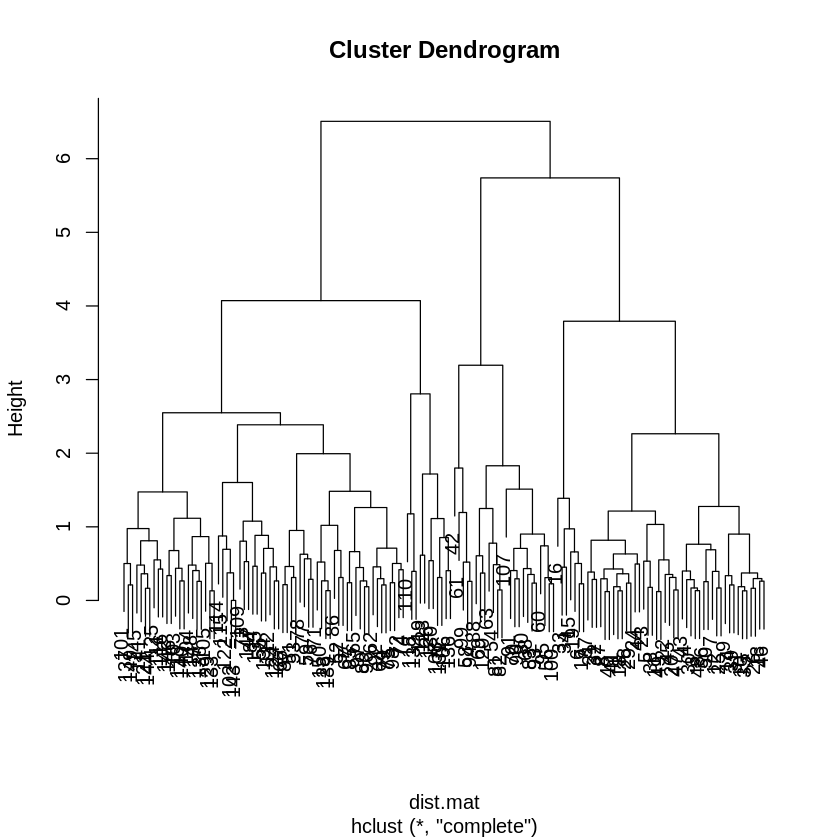

In [16]:
plot(h.clusts)

Notice the following properties of this dendrogram:
- The individual data cases are on the leaves of the tree, shown across the bottom of the dendrogram. 
- The root of the tree is at the top of the dendrogram, and represents a cluster containing all data cases.
- The vertical distance between the junctions indicates the distance between the clusters based on the metric and linkage function chosen. Notice that the distances are generally larger toward the root (top) of the dendrogram. Whereas, near the leaves (bottom) the distances are quite small.

We need to go from a dendrogram to a set of cluster assignments. This is done by cutting the dendrogram at some point. Cutting at a specified level results in cluster assignments defined by the branches below the cut point. 

In this case, we will start with a cut at $k=3$. You can see that the vertical distance (cluster separation) on the dendrogram at $k=3$ is relatively large. This indicates that $k-3$ is a reasonable starting guess. 

The code in the cell below does the following:

1. Labels clusters at $k=3$ using the `cut` function to cut the dendrogram.
2. Prints a table of the species assigned to each cluster. 
3. Displays a pairs plot for the features with `col = spcies`. 
4. Displays a silhouette plot for these clusters.

Execute this code and examine the results. 

           
clust.cut.3 setosa versicolor virginica
          1     49          0         0
          2      1         21         2
          3      0         29        48

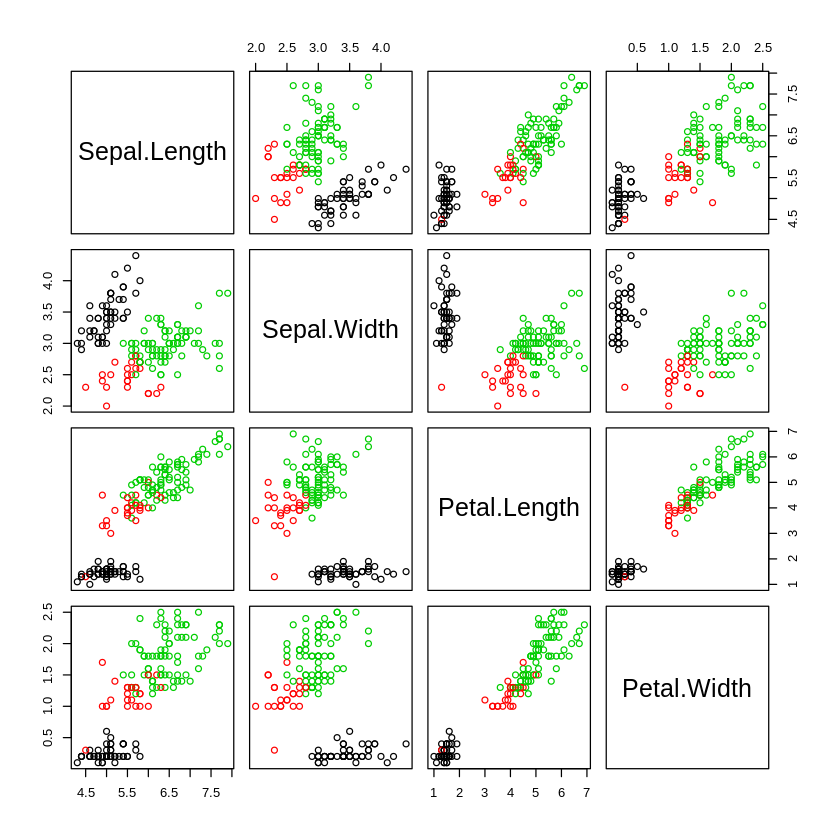

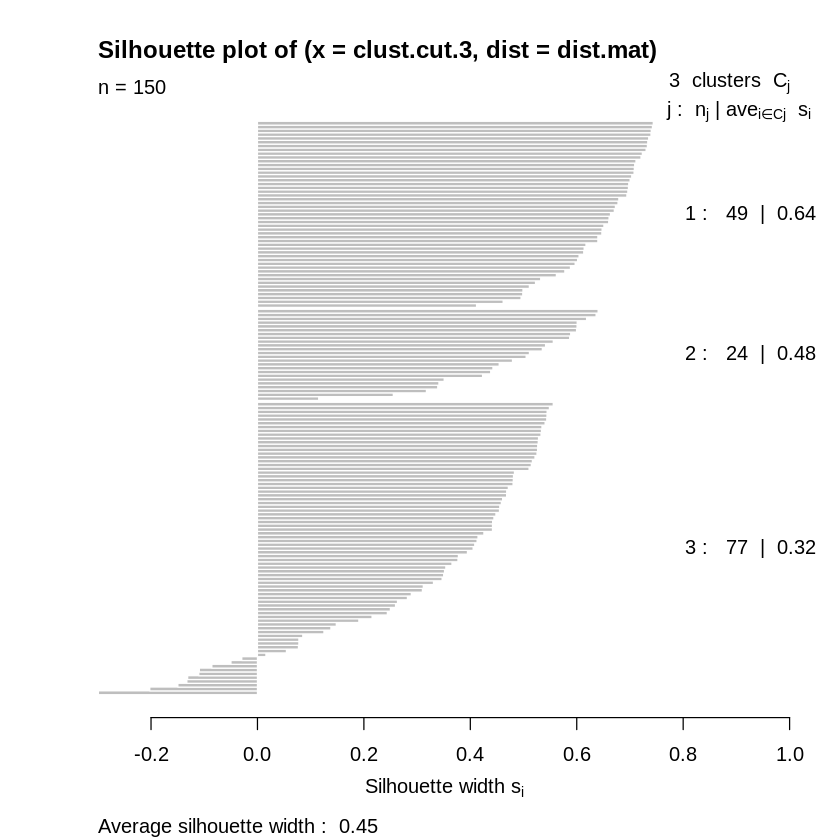

In [17]:
clust.cut.3 = cutree(h.clusts, k = 3)
table(clust.cut.3, iris$Species)
pairs(data = iris, ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, 
      col = clust.cut.3)
plot(silhouette(clust.cut.3, dist.mat))

First, examine the table of allocation of iris species to the clusters. The versicolor species is split between clusters 2 and 3, whereas the other species of iris are mostly allocated to a single cluster.

Next, compare the plot of the features allocated by cluster, to the plot made previously allocated by species. Notice that there are significant differences in the plots. 

Finally, only cluster 1 shows an average SC of moderate value, whereas the other two clusters have smaller average SC. Further, cluster 3, exhibits a fair number of negative SC values. 

Overall, it appears that the initial hierarchical clustering of these data is not particularly good. 

### Improving the hierarchical clustering model

Our first hierarchical clustering model does not appear to be particularly good. There are several things we can try to improve the situation. In particular, we can try different cut values ($k$ values) and try some other linkage functions. 

The following code performs the following operations:
1. A function is defined to do the following:
  - Compute the hierarchical dendrogram. The default linkage method, `centriod` is replaced with another linkage method, `ward.D`. 
  - Apply the cut to the dendrogram.
  - Print a frequency table of the cluster assignments by species.
  - Display the silhouette plot.
2. A list of possible cut points is defined. 
3. The `lapply` function is used to iterate over the list of cut points, executing the function each time. 

Execute this code and compare the results to the first model and to each other. 

For cut = 2 and method =  ward.D         
clust.cut setosa versicolor virginica
        1     49          0         0
        2      1         50        50

For cut = 3 and method =  ward.D         
clust.cut setosa versicolor virginica
        1     49          0         0
        2      1         50        23
        3      0          0        27



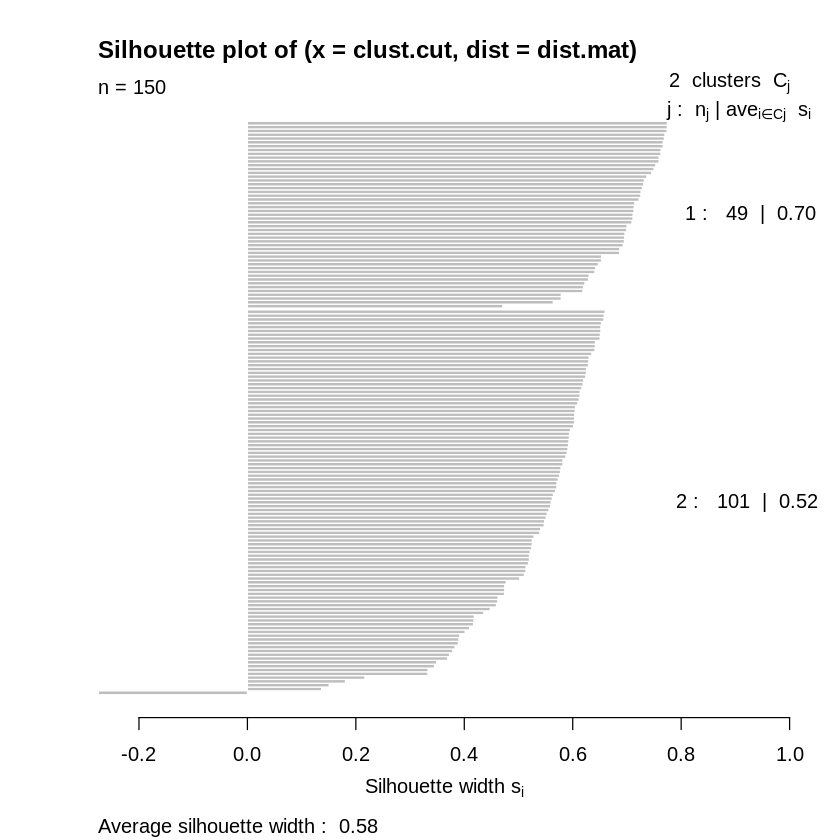

For cut = 4 and method =  ward.D         
clust.cut setosa versicolor virginica
        1     49          0         0
        2      1         19         2
        3      0         31        21
        4      0          0        27



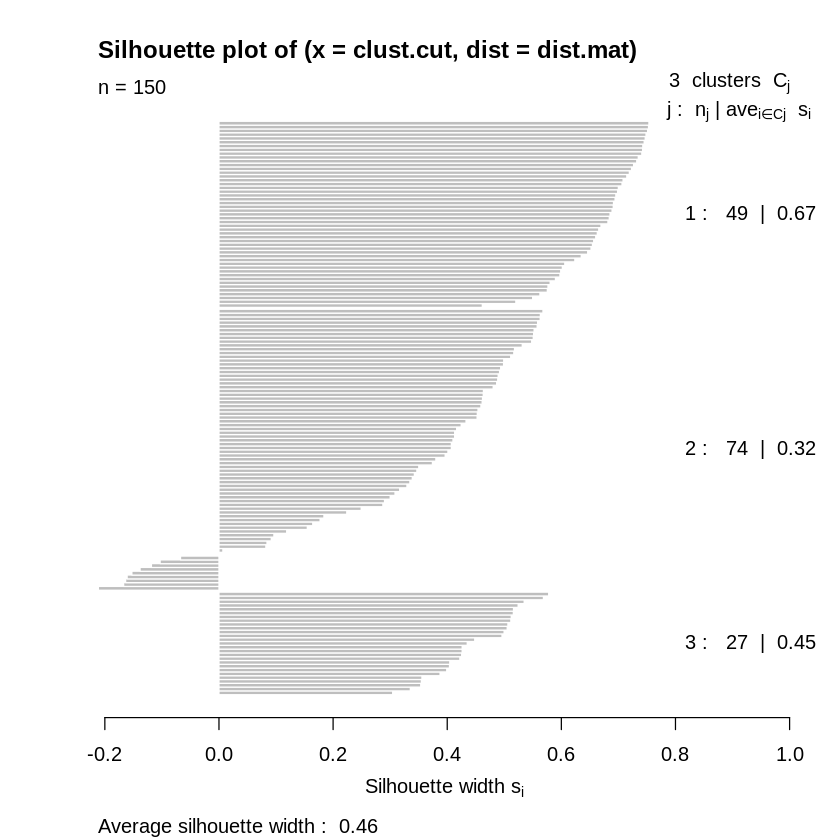

For cut = 5 and method =  ward.D         
clust.cut setosa versicolor virginica
        1     33          0         0
        2     16          0         0
        3      1         19         2
        4      0         31        21
        5      0          0        27



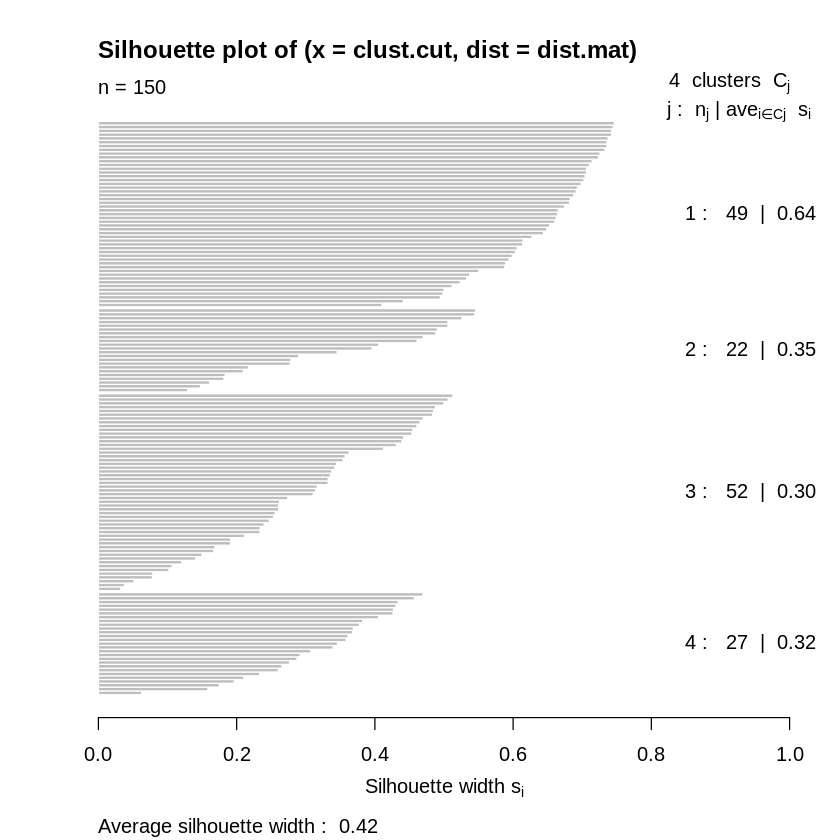

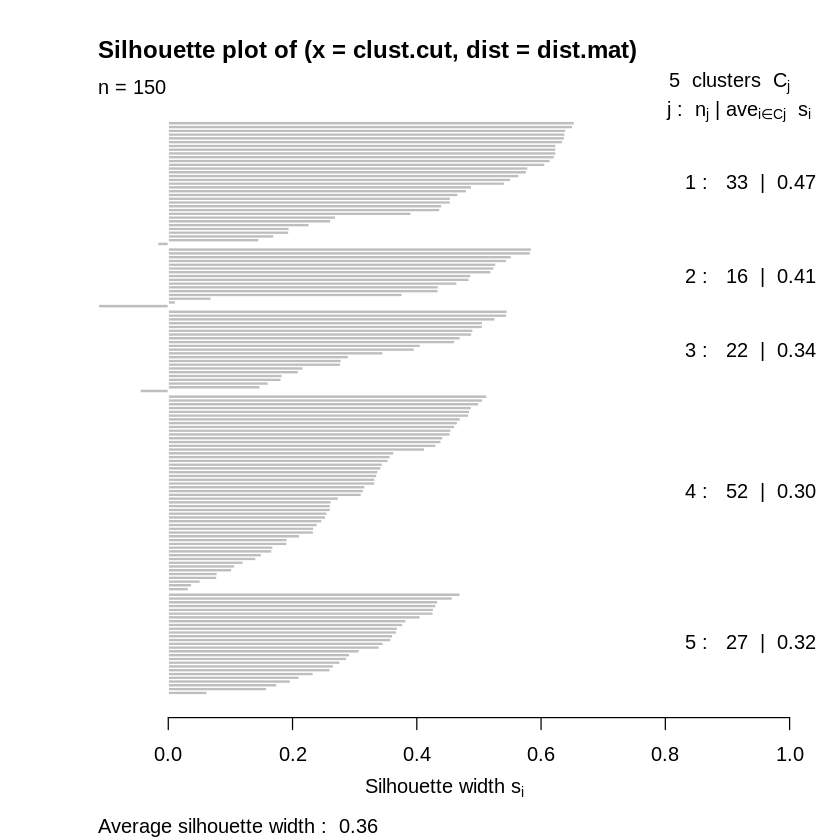

In [18]:
test.cuts = function(cut, dist.mat, method = 'ward.D'){
  require(cluster)
  clusts = hclust(dist.mat, method = method)
  clust.cut = cutree(clusts, k = cut)
  cat('For cut =', cut, 'and method = ', method)
  print(table(clust.cut, iris$Species))
  cat('\n')
  plot(silhouette(clust.cut, dist.mat))
}


cuts = c(2, 3, 4, 5)
invisible(lapply(cuts, test.cuts, dist.mat))

Unfortunately, the new clusters do not seem to be any better than the original model. For $k=2$ and $k=3$ the average SC values of the clusters is similar and there are significant numbers of negative SC values for $k=3$. With $k=4$ or $k=5$ there is still poor allocation of the species to the clusters and the average SC values are relatively small. 

***
# <font color="blue">Your Turn:</font>

The foregoing models use a Euclidian distance metric. Now, you will compute and compare a hierarchical clustering model using the Manhattan distance metric. Perform the following steps:
1. Compute the distance matrix using the `iris.scale` feature data frame and with ` method = 'manhattan'`. 
2. Compute the hierarchical cluster model.
3. Plot the dendrogram of the hierarchical cluster model.
4. Iterate over a list of cut points, $k = \{2, 3, 4, 5 \}$, and display the frequency table of cluster assignments by species and the silhouette plots.

**Hint:** Make sure you use different names for the distance matrix and cluster objects. 
***

           
clust.cut.3 setosa versicolor virginica
          1     50          0         0
          2      0         25        48
          3      0         25         2

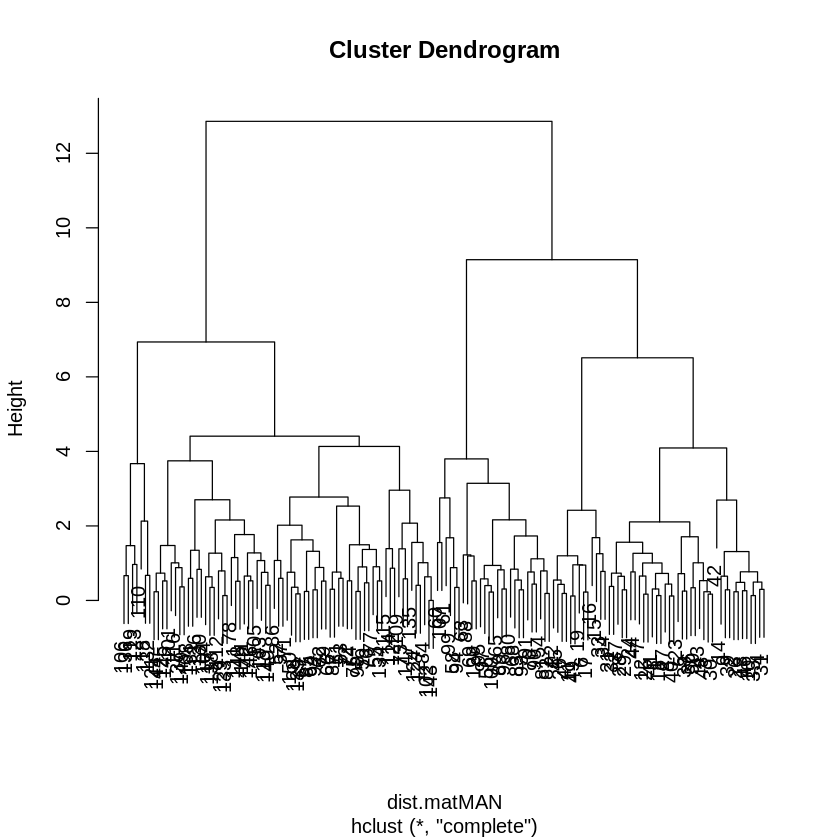

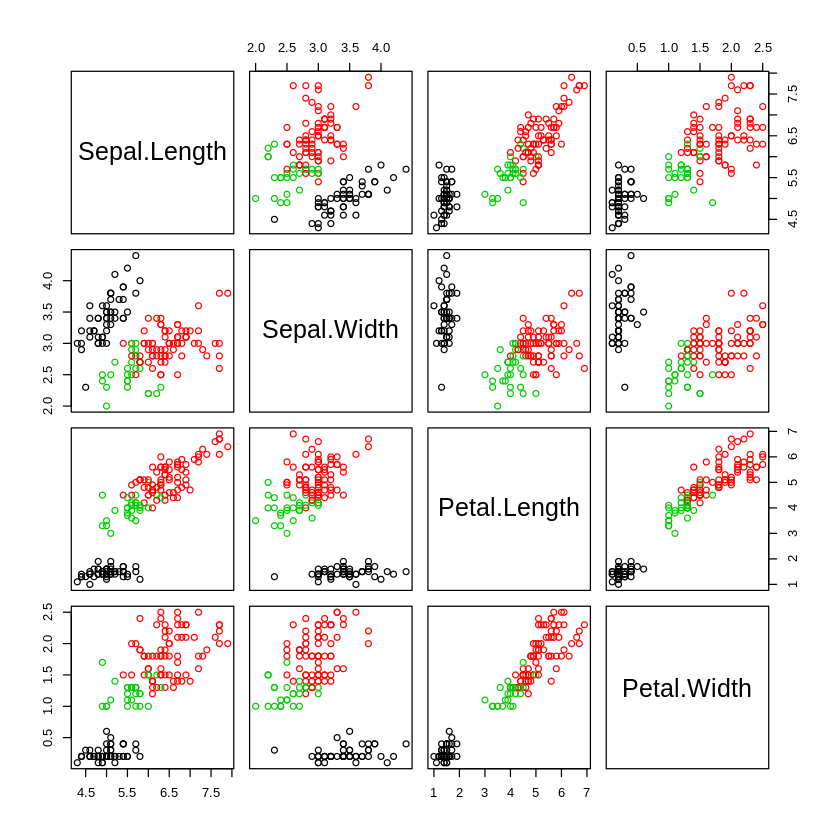

For cut = 2 and method =  ward.D         
clust.cut setosa versicolor virginica
        1     49          0         0
        2      1         50        50



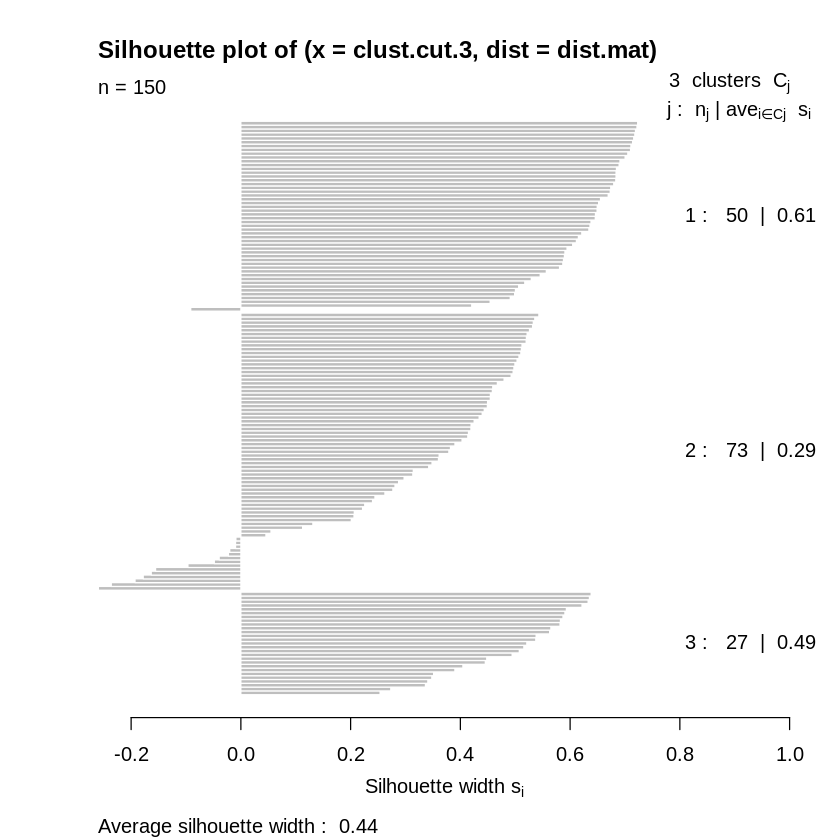

For cut = 3 and method =  ward.D         
clust.cut setosa versicolor virginica
        1     49          0         0
        2      1         50        23
        3      0          0        27



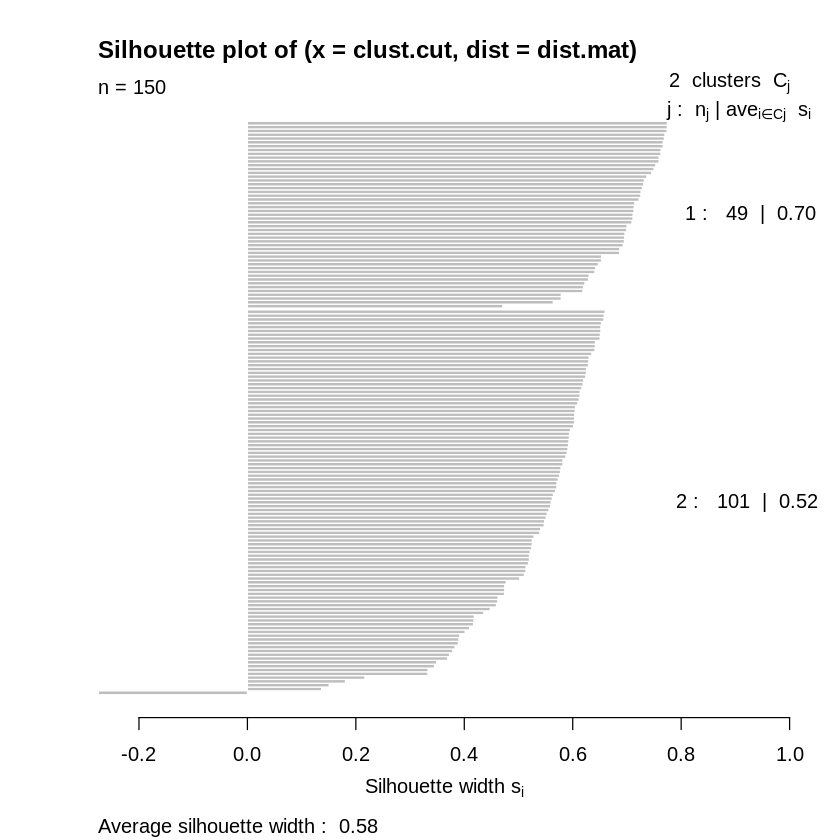

For cut = 4 and method =  ward.D         
clust.cut setosa versicolor virginica
        1     49          0         0
        2      1         19         2
        3      0         31        21
        4      0          0        27



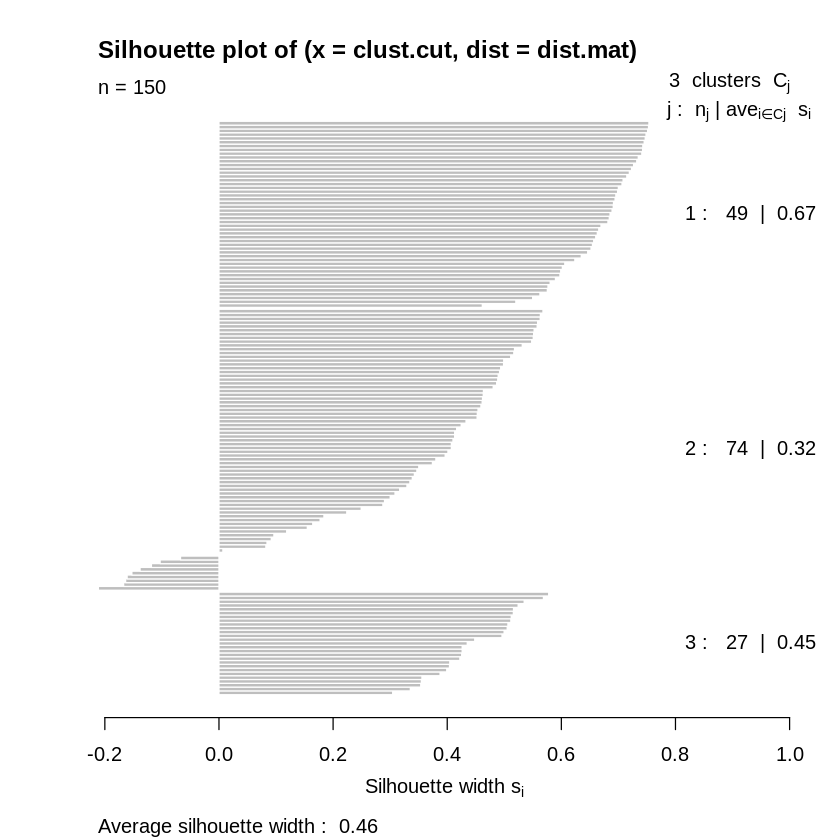

For cut = 5 and method =  ward.D         
clust.cut setosa versicolor virginica
        1     33          0         0
        2     16          0         0
        3      1         19         2
        4      0         31        21
        5      0          0        27



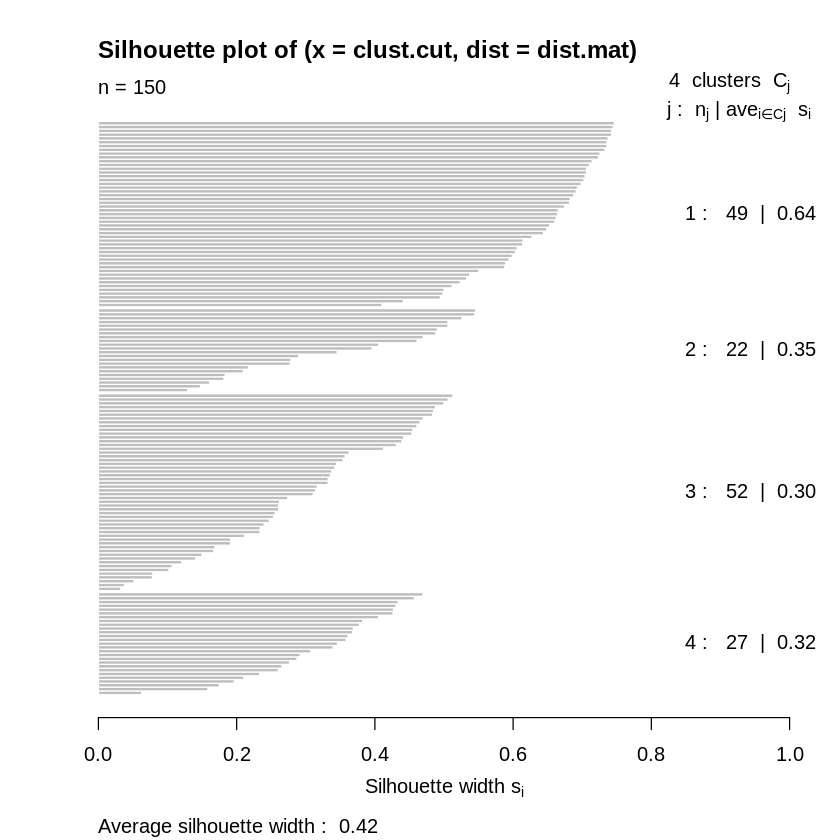

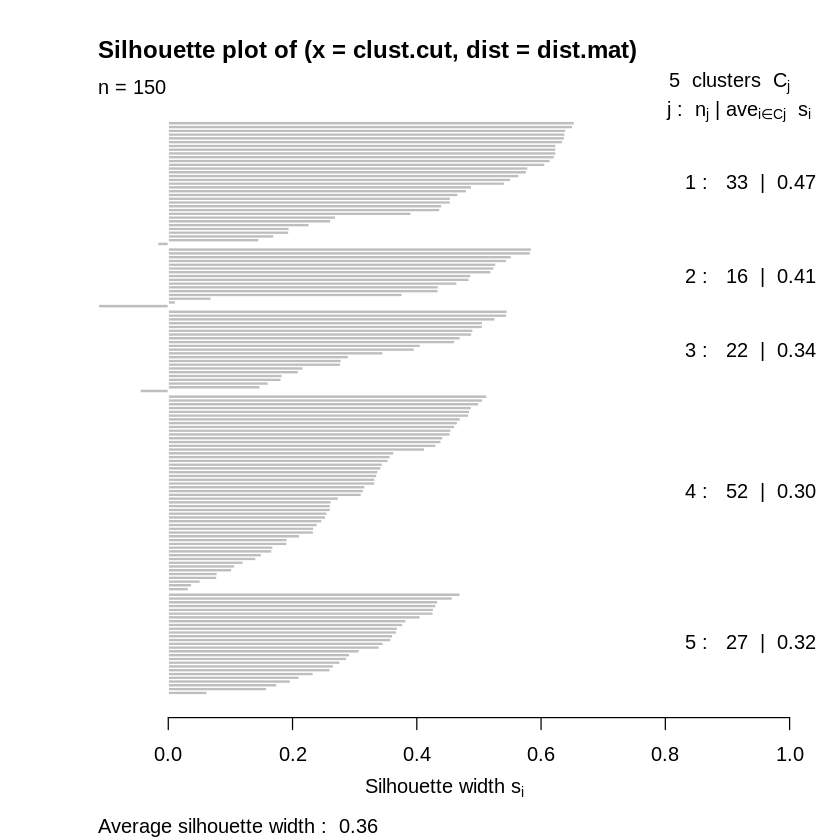

In [19]:
dist.matMAN = dist(iris.scale, method = "manhattan")
h.clustsMAN = hclust(dist.matMAN)

plot(h.clustsMAN)

clust.cut.3 = cutree(h.clustsMAN, k = 3)
table(clust.cut.3, iris$Species)
pairs(data = iris, ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, 
      col = clust.cut.3)
plot(silhouette(clust.cut.3, dist.mat))


test.cuts = function(cut, dist.mat, method = 'ward.D'){
  require(cluster)
  clusts = hclust(dist.mat, method = method)
  clust.cut = cutree(clusts, k = cut)
  cat('For cut =', cut, 'and method = ', method)
  print(table(clust.cut, iris$Species))
  cat('\n')
  plot(silhouette(clust.cut, dist.mat))
}

cuts = c(2, 3, 4, 5)
invisible(lapply(cuts, test.cuts, dist.mat))

<div style="background-color: ivory">
<h3>Questions</h3>

<p>Compare the results of your Manhattan distance metric model with those for the Euclidian distance metric. Answer the following questions:</P>
<ol>
<li>Do the frequency tables appear significantly different? </li>
<li>Are the dendograms significantly different? </li>
<li>For the $k=4$ and $k=5$ models, are the silhouette plots significantly different, and if so how? </li>
</ol>
</div>

### Answers:
1.

2.

3.

## Summary

In this lesson you have explored some unsupervised learning methods. These methods do not require a label with a known value. Specifically, you have performed the following:
1.	Reviewed the theory of the k-means clustering methods.
2.	Applied k-means clustering to the iris data and plotted the results. 
3.	Determined the number clusters by charting the WCSS vs. kk.
4.	Used WCSS, BCSS and silhouette coefficients to compare k-mean cluster models.
5.	Reviewed the theory of hierarchical clustering methods. These models use both a distance metric and a linkage function.
6.	Examined the dendrogram of the hierarchical clustering model and apply cut points to assign data cases to clusters.
7.	Use silhouette plots to evaluate and compare hierarchical clustering models.
